# Experiment - 3: Decision trees

Create and test a classification model using Decision Tree Algorithm to find a proper drug for a new patient.

Dataset: drug200.csv



# Import necessary libraries


In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import matplotlib.pyplot as plt

# Get data

In [2]:
df = pd.read_csv('/content/drug200.csv')
df.head()

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


# Pre-processing data

X as the Feature Matrix only
Y as the response vector (target)


In [4]:
X = df[['Age', 'Gender', 'BP', 'Cholesterol', 'Na_to_K']]
X[0:5]

,Age,Gender,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


Handle categoerical variables Gender, BP and Cholestrol

In [5]:
X=pd.get_dummies(X)

In [6]:
X.head()

,Age,Na_to_K,Gender_F,Gender_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1,0,1,0,0,1,0
1,47,13.093,0,1,0,1,0,1,0
2,47,10.114,0,1,0,1,0,1,0
3,28,7.798,1,0,0,0,1,1,0
4,61,18.043,1,0,0,1,0,1,0


In [7]:
Y=df['Drug']
Y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

# Train Test Split


In [8]:
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, Y, test_size=0.3, random_state=3)

# Training

In [9]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree

drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Predictions on Test Set

In [10]:
predTree = drugTree.predict(X_testset)

Let's compare predicted values with Y Test values

In [11]:
print (predTree [0:5])
print (y_testset [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


# Evaluation


In [12]:
from sklearn import metrics

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


# Visualisation


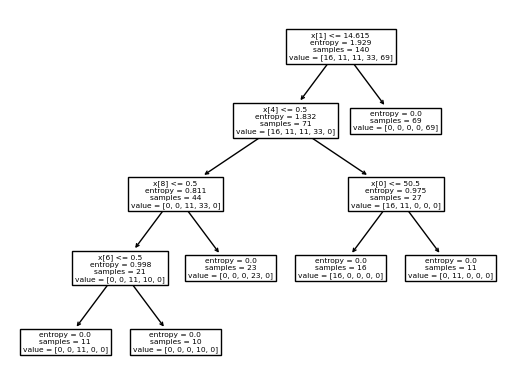

In [13]:
tree.plot_tree(drugTree)
plt.show()